**Downloading the data**

In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get historical market data
hist = msft.history(period="max")

print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.054792    0.062849    0.054792    0.060163   
1986-03-14 00:00:00-05:00    0.060163    0.063386    0.060163    0.062311   
1986-03-17 00:00:00-05:00    0.062311    0.063923    0.062311    0.063386   
1986-03-18 00:00:00-05:00    0.063386    0.063923    0.061237    0.061774   
1986-03-19 00:00:00-05:00    0.061774    0.062311    0.060163    0.060700   
...                               ...         ...         ...         ...   
2024-05-08 00:00:00-04:00  408.170013  412.230011  406.709991  410.540009   
2024-05-09 00:00:00-04:00  410.570007  412.720001  409.100006  412.320007   
2024-05-10 00:00:00-04:00  412.940002  415.380005  411.799988  414.739990   
2024-05-13 00:00:00-04:00  418.010010  418.350006  410.820007  413.720001   
2024-05-14 00:00:00-04:00  412.299988  412.933990  411.549988  412.799988   

In [ ]:
import os
import pandas as pd

DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
  #Read from file if the data is already downloaded.
  with open(DATA_PATH) as f:
    msft_hist = pd.read_json(DATA_PATH)
else:
  msft = yf.Ticker("MSFT")
  msft_hist = msft.history(period="max")

  #save the file to json in case we need it later which prevents from redownloading.
  msft_hist.to_json(DATA_PATH)

**Exploring the data**

In [ ]:
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0


<Axes: xlabel='Date'>

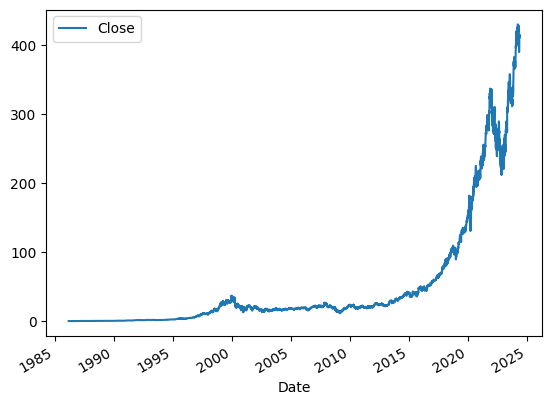

In [ ]:
#visualize msft stock price
msft_hist.plot.line(y="Close", use_index=True)

**setting up the target**

In [ ]:
#to know the actual closing price
data = msft_hist[["Close"]]
data = data.rename(columns={"Close": "actual_close"})

#setup the target. It identifies if the price went up or down
data["target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
data.head()

,actual_close,target
Date,,
1986-03-13 00:00:00-05:00,0.060163,NaN
1986-03-14 00:00:00-05:00,0.062311,1.0
1986-03-17 00:00:00-05:00,0.063386,1.0
1986-03-18 00:00:00-05:00,0.061774,0.0
1986-03-19 00:00:00-05:00,0.060700,0.0


**shifting data forward**

In [ ]:
#shift stock price one day forward
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,6.776640e+07,0.0,0.0


**combining data**

In [ ]:
#create training data
predictors =["Close","Volume","Open","High","Low"]
data = data.join(msft_prev[predictors]).iloc[1:]
data.head()

,actual_close,target,Close,Volume,Open,High,Low
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062311,1.0,0.060163,1.031789e+09,0.054792,0.062849,0.054792
1986-03-17 00:00:00-05:00,0.063386,1.0,0.062311,3.081600e+08,0.060163,0.063386,0.060163
1986-03-18 00:00:00-05:00,0.061774,0.0,0.063386,1.331712e+08,0.062311,0.063923,0.062311
1986-03-19 00:00:00-05:00,0.060700,0.0,0.061774,6.776640e+07,0.063386,0.063923,0.061237
1986-03-20 00:00:00-05:00,0.059089,0.0,0.060700,4.789440e+07,0.061774,0.062311,0.060163


**create machine learning model**

In [ ]:
#set the model
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#create a random forest classification model. set min_samples_split hight to ensure no overfitting.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

**training the model**

In [ ]:
#create train and test set
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

**measuring errors**

In [ ]:
from sklearn.metrics import precision_score

#evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5

<Axes: xlabel='Date'>

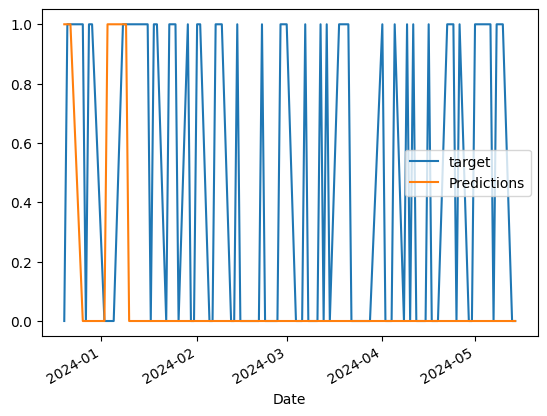

In [ ]:
combined = pd.concat({"target": test["target"],"Predictions": preds}, axis=1)
combined.plot()

**backtesting**

In [ ]:
i =1000 #training set
step = 750 # test set

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["target"])
preds = model.predict(test[predictors])


**predicting probabilities**

In [ ]:
preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0
preds.head()

Date
2023-12-20 00:00:00-05:00    0.0
2023-12-21 00:00:00-05:00    0.0
2023-12-22 00:00:00-05:00    0.0
2023-12-26 00:00:00-05:00    0.0
2023-12-27 00:00:00-05:00    0.0
dtype: float64

pulling it into a loop

In [ ]:
predictions = []
#loop over dataset in increments

for i in range(1000, data.shape[0], step):
  #split into train and test sets
  train = data.iloc[0:i].copy()
  test = data.iloc[i:(i+step)].copy()

  #fit the random forest model
  model.fit(train[predictors], train["target"])

  #make predictions
  preds = model.predict_proba(test[predictors])[:,1]
  preds = pd.Series(preds, index=test.index)
  preds[preds > .6] = 1
  preds[preds<=.6] = 0

  #combine predictions and test values
  combined = pd.concat({"target": test["target"],"Predictions": preds}, axis=1)

  predictions.append(combined)

In [ ]:
predictions[0].head()

,target,Predictions
Date,,
1990-02-27 00:00:00-05:00,0.0,1.0
1990-02-28 00:00:00-05:00,1.0,1.0
1990-03-01 00:00:00-05:00,1.0,1.0
1990-03-02 00:00:00-05:00,1.0,1.0
1990-03-05 00:00:00-05:00,1.0,1.0


**creating backtest function to create predictions across whole dataset whenever we want**

In [ ]:
def backtest(data,model,predictors,start=1000,step=750):
  predictions =[]
  #loop over the dataset in increment
  for i in range(start, data.shape[0], step):
    #split into train and etst sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    #fit the random forest model
    model.fit(train[predictors], train["target"])

    #make predictions
    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    #combine predictions and test values
    combined = pd.concat({"target": test["target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

  return pd.concat(predictions)

In [ ]:
#running the function
predictions = backtest(data, model, predictors)



In [ ]:
predictions["Predictions"].value_counts()

Predictions
0.0    7903
1.0     716
Name: count, dtype: int64

In [ ]:
predictions["target"].value_counts()

target
1.0    4370
0.0    4249
Name: count, dtype: int64

In [ ]:
precision_score(predictions["target"],predictions["Predictions"])

0.505586592178771

In [ ]:
#rolling means
weekly_mean = data.rolling(7).mean()["Close"]
quaterly_mean = data.rolling(90).mean()["Close"]
annual_mean = data.rolling(365).mean()["Close"]

In [ ]:
weekly_trend = data.shift(1).rolling(7).sum()["target"]

In [ ]:
data["weekly_mean"] = weekly_mean/ data["Close"]
data["quaterly_mean"] = quaterly_mean / data["Close"]
data["annual_mean"] = annual_mean /data["Close"]


In [ ]:
data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quaterly_mean"] = data["annual_mean"] / data["quaterly_mean"]

In [ ]:
data["weekly_trend"] = weekly_trend

In [ ]:
data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [ ]:
full_predtictors = predictors +["weekly_mean", "quaterly_mean", "annual_mean", "annual_weekly_mean", "annual_quaterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio"]

In [ ]:
#updating predictions
predictions = backtest(data.iloc[365:], model, full_predtictors)


In [ ]:
precision_score(predictions["target"], predictions["Predictions"])

0.5895765472312704

In [ ]:
#evaluating the predictions
predictions["Predictions"].value_counts()

Predictions
0.0    7947
1.0     307
Name: count, dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

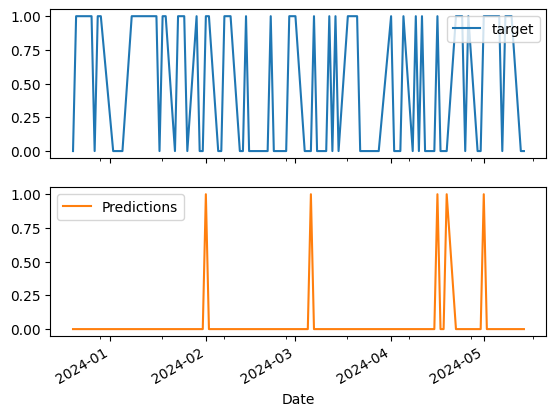

In [ ]:
# prompt: create a plot to show trades that would have been made in last 100 days

predictions[-100:].plot(subplots=True)
